In [131]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

plt.style.use('dark_background')

In [133]:
cameras = pd.read_csv('cameras.csv')

cameras.head()

,input.search_query,input.api_key,input.page,products.sku,products.score,products.productId,products.name,products.source,products.type,products.startDate,...,products.hdmiOutputs,from,to,currentPage,total,totalPages,queryTime,totalTime,partial,canonicalUrl
0,search=camera,XXX,NaN,5808503,NaN,NaN,Wired Camera Install (Up to 4 Cameras),NaN,HardGood,2015-01-19,...,NaN,1,100,1,3137,32,0.022,0.334,False,"/v1/products(search=""camera"")?pageSize=100&for..."
1,search=camera,XXX,NaN,5809015,NaN,NaN,Wired Camera Install (Up to 8 Cameras),NaN,HardGood,2016-02-17,...,NaN,1,100,1,3137,32,0.022,0.334,False,"/v1/products(search=""camera"")?pageSize=100&for..."
2,search=camera,XXX,NaN,6912708,NaN,NaN,Wired Camera Install (Up to 2 Cameras),NaN,HardGood,2016-02-17,...,NaN,1,100,1,3137,32,0.022,0.334,False,"/v1/products(search=""camera"")?pageSize=100&for..."
3,search=camera,XXX,NaN,5808418,NaN,NaN,Wireless Camera Install (Up to 4 Cameras),NaN,HardGood,2015-01-19,...,NaN,1,100,1,3137,32,0.022,0.334,False,"/v1/products(search=""camera"")?pageSize=100&for..."
4,search=camera,XXX,NaN,5808421,NaN,NaN,Wireless Camera Install (Up to 8 Cameras),NaN,HardGood,2015-01-19,...,NaN,1,100,1,3137,32,0.022,0.334,False,"/v1/products(search=""camera"")?pageSize=100&for..."


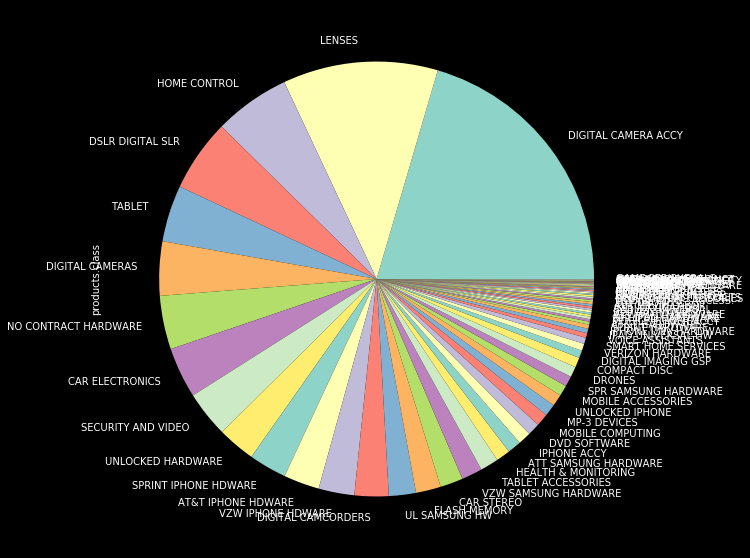

In [135]:
cameras['products.class'] \
    .value_counts() \
    .sort_values(ascending=False) \
    .plot(kind='pie', figsize=(10,10))

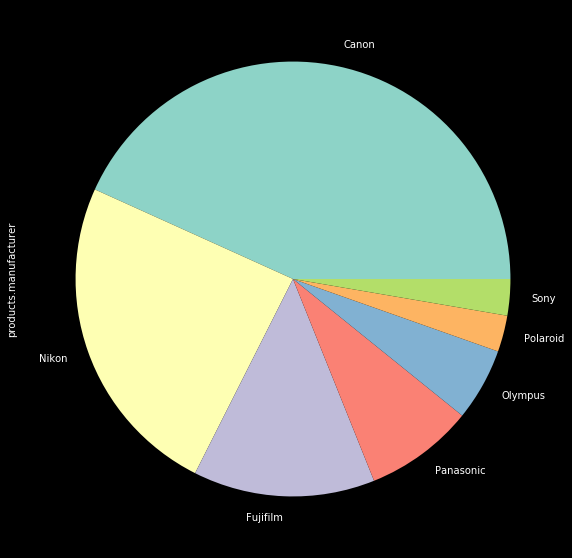

In [136]:
digital_cameras = cameras[cameras['products.class'] == 'DIGITAL CAMERAS']
sale_digital_cameras = digital_cameras[digital_cameras['products.onSale'] == True]

sale_digital_cameras['products.manufacturer'] \
    .value_counts() \
    .sort_values(ascending=False) \
    .plot(kind='pie', figsize=(10,10))

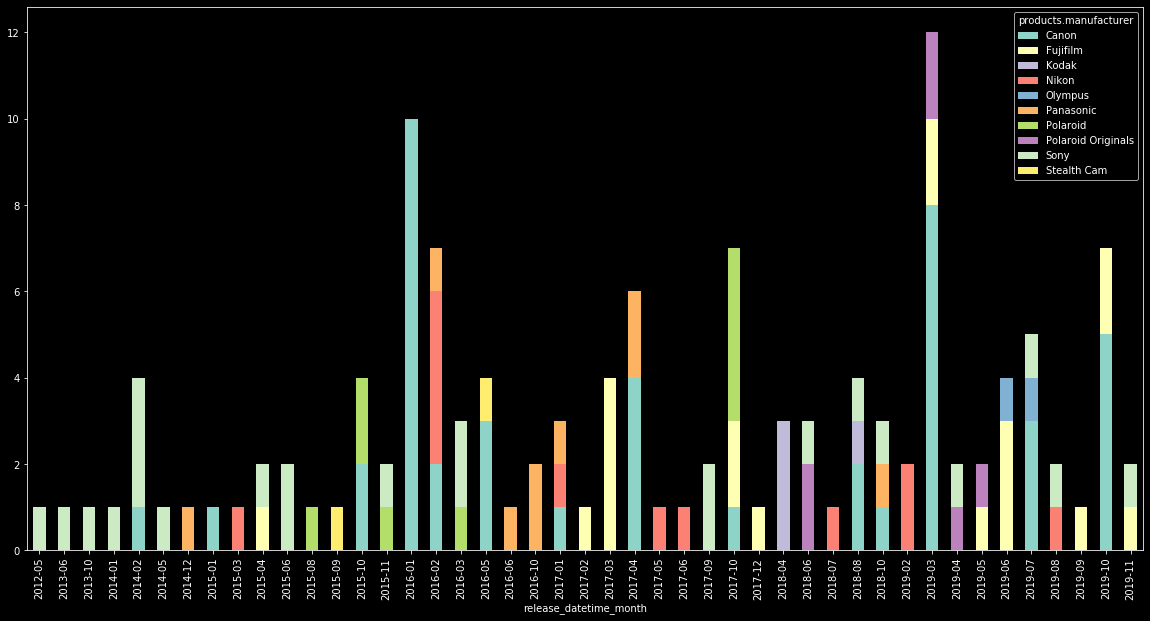

In [148]:
digital_cameras['release_datetime'] = pd.to_datetime(
    digital_cameras['products.startDate'],
)
digital_cameras['release_datetime_month'] = digital_cameras['release_datetime'].dt.to_period('M')

digital_cameras \
    .groupby('products.manufacturer')['release_datetime_month'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', stacked=True, figsize=(20,10))

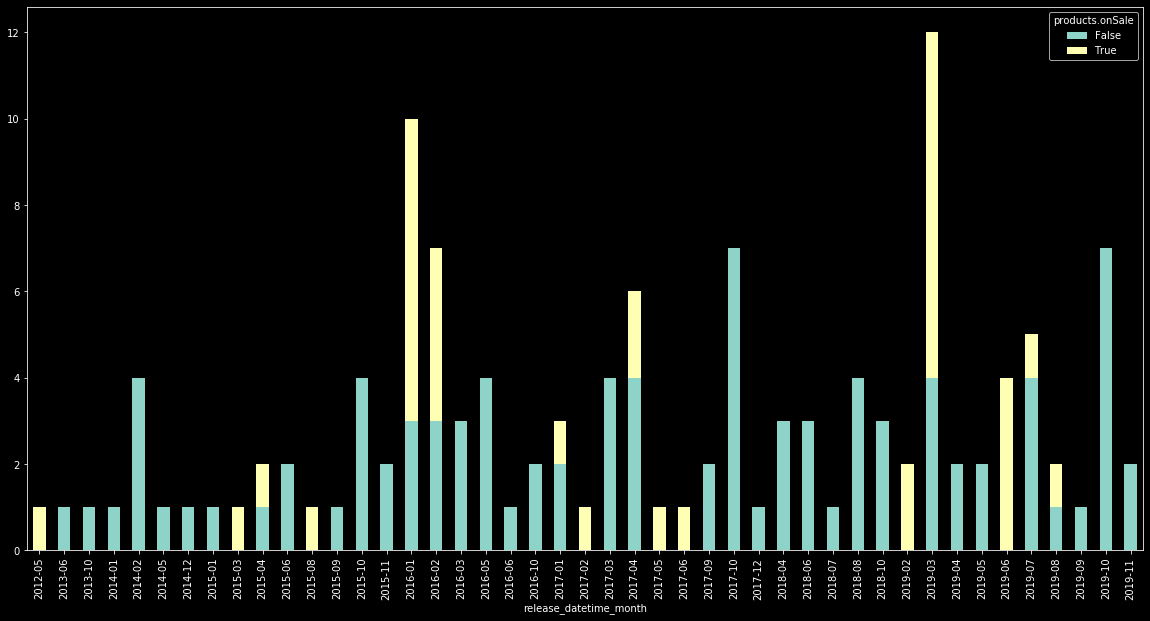

In [150]:
digital_cameras['release_datetime'] = pd.to_datetime(
    digital_cameras['products.startDate'],
)
digital_cameras['release_datetime_month'] = digital_cameras['release_datetime'].dt.to_period('M')

digital_cameras \
    .groupby('products.onSale')['release_datetime_month'] \
    .value_counts() \
    .unstack() \
    .transpose() \
    .sort_index(ascending=True) \
    .plot(kind='bar', stacked=True, figsize=(20,10))

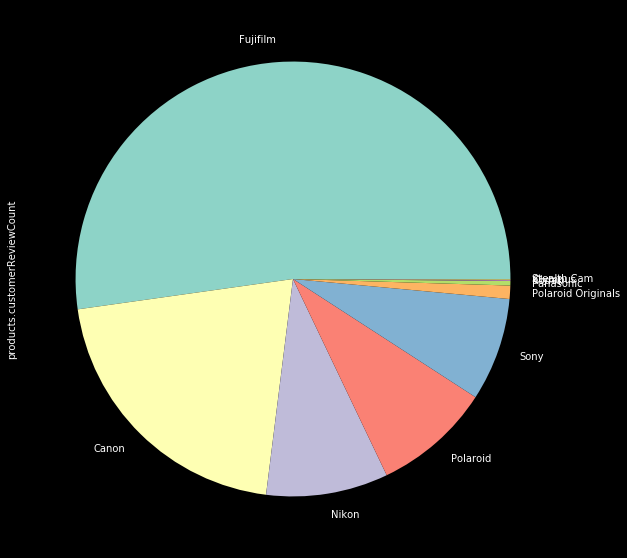

In [155]:
digital_cameras \
    .groupby('products.manufacturer')['products.customerReviewCount'] \
    .sum() \
    .sort_values(ascending=False)[:20] \
    .plot(kind='pie', figsize=(10,10))

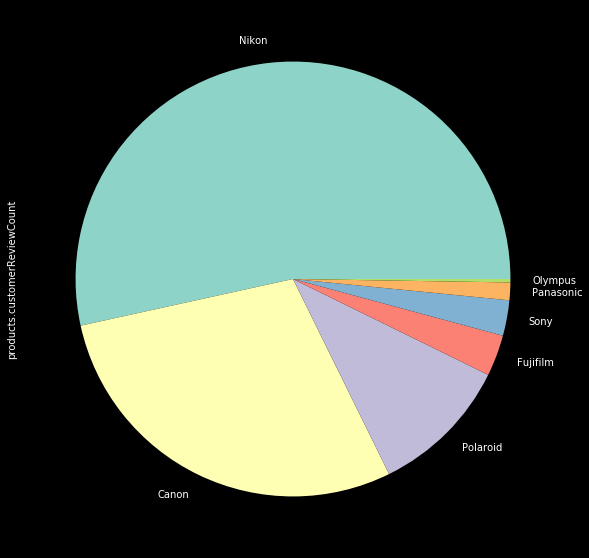

In [154]:
sale_digital_cameras \
    .groupby('products.manufacturer')['products.customerReviewCount'] \
    .sum() \
    .sort_values(ascending=False)[:20] \
    .plot(kind='pie', figsize=(10,10))

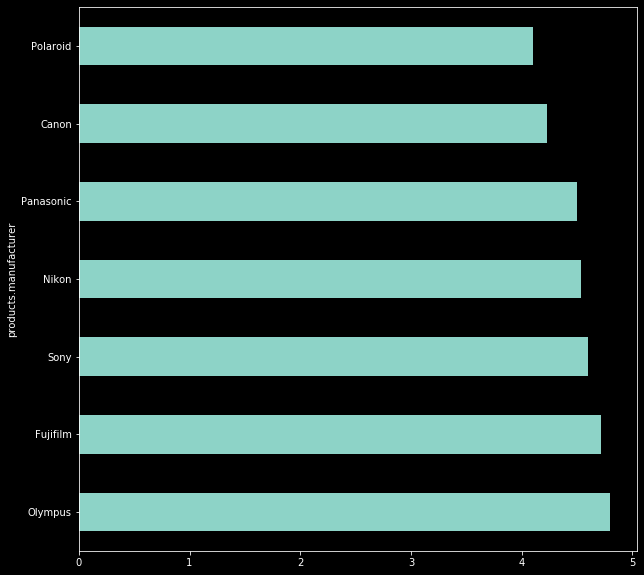

In [157]:
sale_digital_cameras \
    .groupby('products.manufacturer')['products.customerReviewAverage'] \
    .mean() \
    .sort_values(ascending=False) \
    .plot(kind='barh', figsize=(10,10))

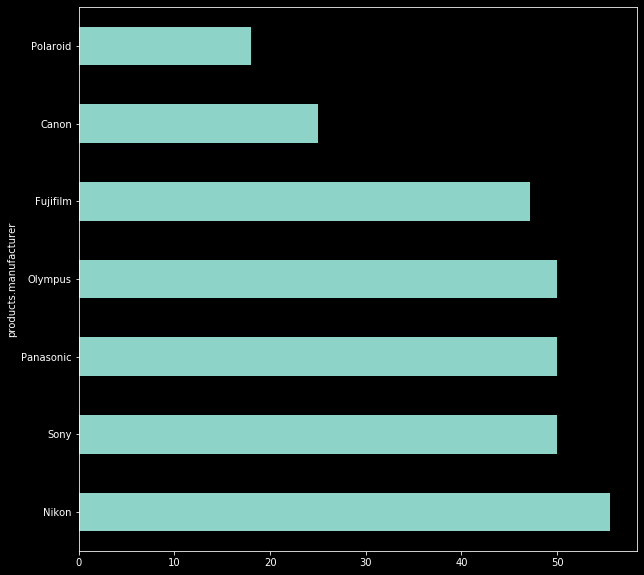

In [158]:
sale_digital_cameras['discount'] = sale_digital_cameras['products.regularPrice'] - sale_digital_cameras['products.salePrice']

sale_digital_cameras \
    .groupby('products.manufacturer')['discount'] \
    .mean() \
    .sort_values(ascending=False) \
    .plot(kind='barh', figsize=(10,10))